In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [147]:
raw_data = pd.ExcelFile('rbull1.xlsx')

In [148]:
raw_data.sheet_names

['rbull1.csv']

In [149]:
data = raw_data.parse('rbull1.csv')

In [150]:
data.head()

,date,id,clicks,conversions,cost,impressions
0,2018-05-01,23842875301030600,2,1,4.360000,227
1,2018-05-01,23842872626260600,1,0,5.520258,263
2,2018-05-01,23842875301030600,5,2,5.340000,278
3,2018-05-01,23842860746290600,0,0,0.070000,1
4,2018-05-01,23842872626260600,5,1,13.080612,702


In [151]:
data['ClicksperCost'] = (data['clicks']/data['cost']).replace([np.inf, -np.inf], 0)

In [152]:
data.head()

,date,id,clicks,conversions,cost,impressions,ClicksperCost
0,2018-05-01,23842875301030600,2,1,4.360000,227,0.458716
1,2018-05-01,23842872626260600,1,0,5.520258,263,0.181151
2,2018-05-01,23842875301030600,5,2,5.340000,278,0.936330
3,2018-05-01,23842860746290600,0,0,0.070000,1,0.000000
4,2018-05-01,23842872626260600,5,1,13.080612,702,0.382245


In [153]:
opt_data = (data[['date','id','ClicksperCost']].copy(deep = True))

In [154]:
data_final = pd.pivot_table(data=opt_data, values= 'ClicksperCost', columns='id',fill_value= 0,index='date',aggfunc='sum').reset_index()
data_final.drop('date',inplace= True, axis=1)

In [155]:
data_initial_set = pd.pivot_table(data = data, values= ['clicks','conversions'], fill_value= 0, index='id',aggfunc='sum')

In [156]:
data_initial_set['TotalClicksperConversion'] = (data_initial_set['clicks']/data_initial_set['conversions']).replace([np.inf, -np.inf,np.NAN], 0)

In [157]:
data_initial_set = pd.pivot_table(data = data_initial_set, columns= 'id', values= 'TotalClicksperConversion', fill_value= 0).reset_index()

In [158]:
data_initial_set.drop('index',inplace= True,axis =1)

In [159]:
data_initial_set

id,6088935321237,6088935321437,6088935333637,6088935334437,6088935350037,6088935350837,6088935363037,6088935363237,6088935365037,6088935365837,...,23843003186980600,23843003186990600,23843003187000600,23843003187010600,23843003187020600,23843003187410600,23843003187420600,23843003187430600,23843003187440600,23843003187450600
0,0.0,5.0,6.5,0.0,2.333333,0.0,0.0,0.0,0.0,2.0,...,2.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,2.0


In [160]:
import gc
del opt_data
del raw_data
del data
gc.collect()

231631

In [161]:
len_data_final = data_final.shape[1]
df = pd.DataFrame()
appender = data_final.iloc[[0]]
while len_data_final >= 0:
    df = df.append(appender,ignore_index= True)
    len_data_final -= 1
df.shape 

(2373, 2372)

In [162]:
df = df.append(data_initial_set)
data_final = df.append(data_final)
data_final.shape

(2439, 2372)

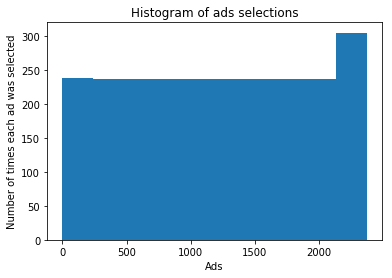

In [163]:
import math
N = data_final.shape[0]
d = data_final.shape[1]
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = data_final.values[n, ad]
#     print(data_final.values[n, ad])
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward


#Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [164]:
from collections import defaultdict
id_reward_map = defaultdict()
for i, id in enumerate(data_final.columns):
    id_reward_map[id] = [i, sums_of_rewards[i], numbers_of_selections[i]]

In [165]:
sorted(id_reward_map.items(), key=lambda x:(x[1][2]), reverse = True)

[(23842875301030600, [2199, 217.78449837978997, 56]),
 (23842872626260600, [2198, 32.38262562770894, 10]),
 (23842860746470600, [2197, 6.165261501058518, 3]),
 (23842860746290600, [2196, 2.0408163265306123, 2]),
 (6088935321237, [0, 0.0, 1]),
 (6088935321437, [1, 0.0, 1]),
 (6088935333637, [2, 0.0, 1]),
 (6088935334437, [3, 0.0, 1]),
 (6088935350037, [4, 0.0, 1]),
 (6088935350837, [5, 0.0, 1]),
 (6088935363037, [6, 0.0, 1]),
 (6088935363237, [7, 0.0, 1]),
 (6088935365037, [8, 0.0, 1]),
 (6088935365837, [9, 0.0, 1]),
 (6088935384237, [10, 0.0, 1]),
 (6088935384437, [11, 0.0, 1]),
 (6088935385037, [12, 0.0, 1]),
 (6088935385237, [13, 0.0, 1]),
 (6088935395237, [14, 0.0, 1]),
 (6088935396037, [15, 0.0, 1]),
 (6088935406837, [16, 0.0, 1]),
 (6088935418437, [17, 0.0, 1]),
 (6088935419237, [18, 0.0, 1]),
 (6088935430837, [19, 0.0, 1]),
 (6088935441237, [20, 0.0, 1]),
 (6088935442437, [21, 0.0, 1]),
 (6088935443037, [22, 0.0, 1]),
 (6088935457837, [23, 0.0, 1]),
 (6088935458237, [24, 0.0, 1])